## Data Exploration

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('D:/ML OPS/Assignment#4/Data/Cleaned/Cleaned_zambia_Solcast.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,25.028571,37.557143,73.857143,917.542857,46.714286,3.250000,73.142857,312.071429,374.214286
1,2019-01-01,1,2019-01-01,26.142857,34.742857,65.000000,917.792857,55.142857,3.507143,635.714286,116.285714,580.785714
2,2019-01-02,1,2019-01-02,27.142857,37.342857,62.857143,916.585714,45.714286,1.878571,495.071429,191.642857,538.285714
3,2019-01-03,1,2019-01-03,26.435714,42.228571,66.357143,915.592857,158.428571,1.514286,93.714286,285.285714,331.714286
4,2019-01-04,1,2019-01-04,23.814286,44.450000,83.571429,916.250000,136.785714,0.971429,67.571429,306.142857,337.357143


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,6.506862,25.465298,27.110243,48.746394,930.380294,96.336627,2.731779,452.350407,153.224925,457.687110
std,3.443314,3.620879,12.633656,17.769091,6.724293,43.301389,0.961919,214.340689,70.083925,97.856606
min,1.000000,16.741667,4.300000,11.750000,912.435714,20.071429,0.646154,0.000000,38.642857,38.642857
25%,4.000000,22.750000,15.766667,35.785714,927.715385,63.153846,1.992857,296.642857,94.250000,421.416667
50%,7.000000,25.350000,24.669231,45.833333,931.038462,85.571429,2.575000,514.615385,140.416667,468.846154
75%,9.000000,27.907143,38.041667,62.642857,935.441667,117.750000,3.350000,634.000000,204.769231,530.714286
max,12.000000,34.992857,53.146154,94.461538,944.416667,323.928571,6.150000,759.214286,350.461538,623.846154


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1093 non-null   object 
 1   MonthPE          1093 non-null   int64  
 2   Date             1093 non-null   object 
 3   Daily_Temp       1093 non-null   float64
 4   Daily_Precip     1093 non-null   float64
 5   Daily_Humidity   1093 non-null   float64
 6   Daily_Pressure   1093 non-null   float64
 7   Daily_WindDir    1093 non-null   float64
 8   Daily_WindSpeed  1093 non-null   float64
 9   Daily_DNI        1093 non-null   float64
 10  Daily_DHI        1093 non-null   float64
 11  Daily_radiation  1093 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 102.6+ KB


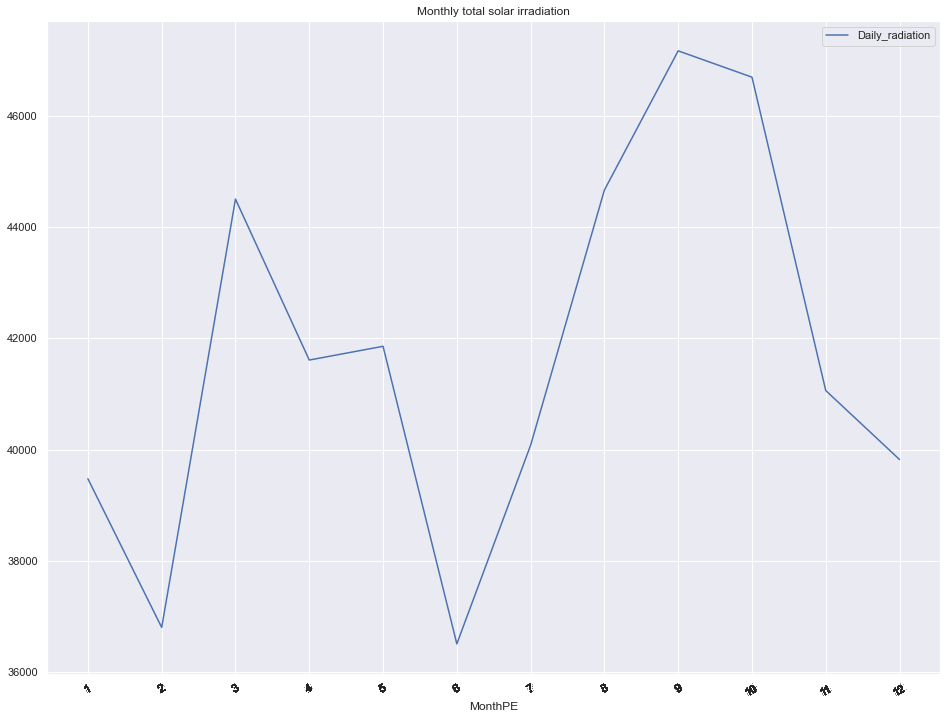

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

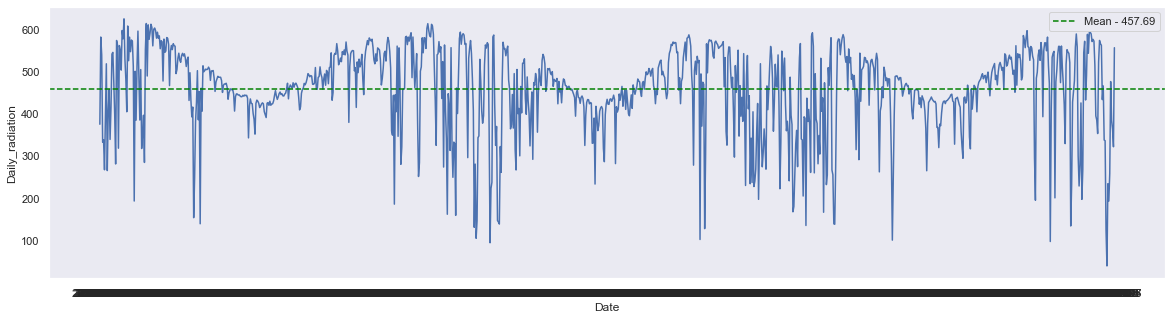

In [7]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

ax.legend()
plt.show()


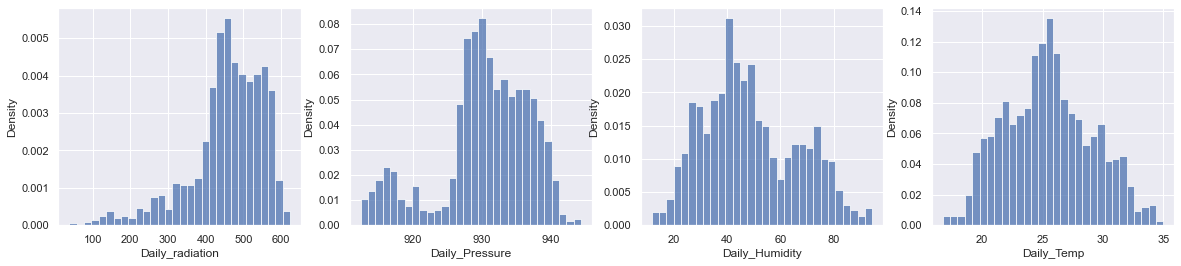

In [8]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

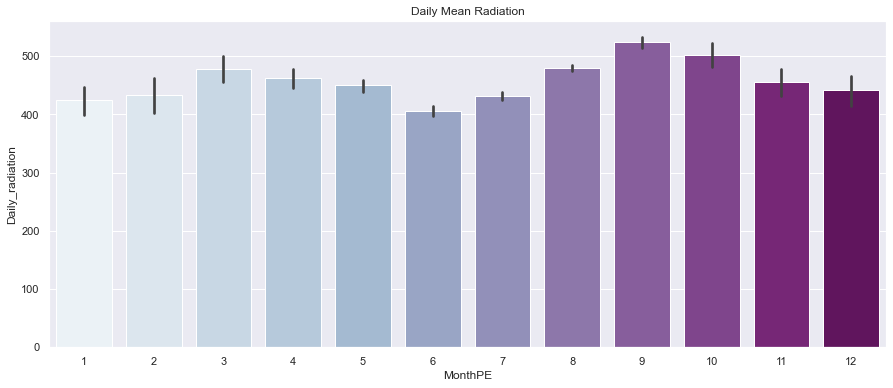

In [9]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

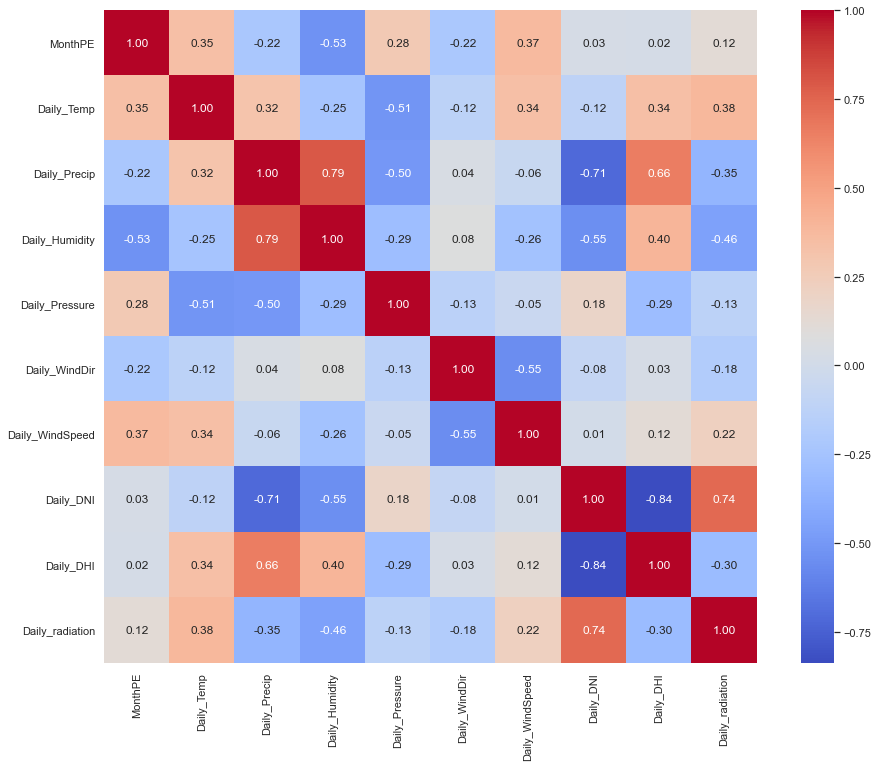

In [10]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [11]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -7.507774
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
